# Plotting - Statistical Tests

The main library for plotting is **matplotlib**, which uses the Matlab plotting capabilities.

We can also use the **seaborn** library on top of that to do visually nicer plots

In [1]:
import pandas as pd
from datetime import datetime #For handling dates
import os

import matplotlib.pyplot as plt #main plotting tool for python
import matplotlib as mpl

import seaborn as sns #A more fancy plotting library

#For presenting plots inline
%matplotlib inline
!pip install tiingo

In [2]:
os.environ["TIINGO_API_KEY"] = "614c1590a592cc6696f6082f83b2666cd83882ef"

In [3]:
from tiingo import TiingoClient
client = TiingoClient({'api_key':'614c1590a592cc6696f6082f83b2666cd83882ef'})
start = datetime(2018,1,1)
end = datetime(2018,12,31)
stocks_data = client.get_dataframe('META',frequency='daily',startDate=start,endDate=end)
stocks_data = stocks_data[['open','close','low','high','volume']]

In [8]:
stocks_data.head()

open   close     low    high       vol
date                                                               
2018-01-02 00:00:00+00:00  177.68  181.42  177.55  181.58  17694891
2018-01-03 00:00:00+00:00  181.88  184.67  181.33  184.78  16595495
2018-01-04 00:00:00+00:00  184.90  184.33  184.10  186.21  13554357
2018-01-05 00:00:00+00:00  185.59  186.85  184.93  186.90  13042388
2018-01-08 00:00:00+00:00  187.20  188.28  186.33  188.90  14719216

In [7]:
df = stocks_data
df = df.rename(columns = {'volume':'vol'})

In [9]:
df['profit'] = (df.close - df.open)
for idx, row in df.iterrows():
    if row.close < row.open:
        df.loc[idx,'gain']='negative'
    elif (row.close - row.open) < 1:
        df.loc[idx,'gain']='small_gain'
    elif (row.close - row.open) < 3:
        df.loc[idx,'gain']='medium_gain'
    else:
        df.loc[idx,'gain']='large_gain'

for idx, row in df.iterrows():
    if row.vol < df.vol.mean():
        df.loc[idx,'size']='small'
    else:
        df.loc[idx,'size']='large'

df.head()

open   close     low    high       vol  profit  \
date                                                                          
2018-01-02 00:00:00+00:00  177.68  181.42  177.55  181.58  17694891    3.74   
2018-01-03 00:00:00+00:00  181.88  184.67  181.33  184.78  16595495    2.79   
2018-01-04 00:00:00+00:00  184.90  184.33  184.10  186.21  13554357   -0.57   
2018-01-05 00:00:00+00:00  185.59  186.85  184.93  186.90  13042388    1.26   
2018-01-08 00:00:00+00:00  187.20  188.28  186.33  188.90  14719216    1.08   

                                  gain   size  
date                                           
2018-01-02 00:00:00+00:00   large_gain  small  
2018-01-03 00:00:00+00:00  medium_gain  small  
2018-01-04 00:00:00+00:00     negative  small  
2018-01-05 00:00:00+00:00  medium_gain  small  
2018-01-08 00:00:00+00:00  medium_gain  small

In [10]:
gain_groups = df.groupby('gain')
gdf= df[['open','low','high','close','vol','gain']].groupby('gain').mean()
gdf = gdf.reset_index()

In [11]:
gdf

gain        open         low        high       close           vol
0   large_gain  170.111111  169.610833  175.313056  174.653889  3.044808e+07
1  medium_gain  172.305769  171.410962  175.321346  174.185577  2.774962e+07
2     negative  171.605492  168.137747  172.566230  169.380246  2.731642e+07
3   small_gain  171.218049  169.827317  173.070488  171.699268  2.476326e+07

### Simple plots

The documentation for the plot function for data frames can be found here:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

<Axes: xlabel='date'>

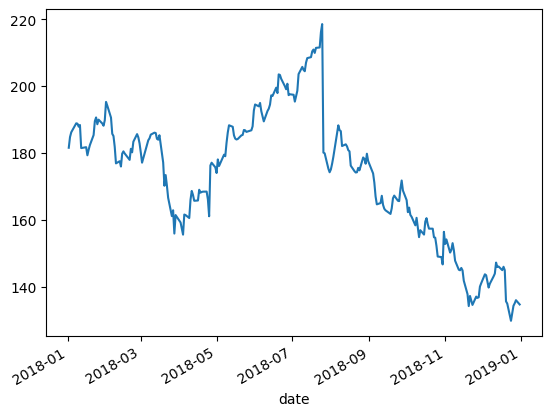

In [ ]:
#plot a column of the dataframe against the index
df.high.plot()

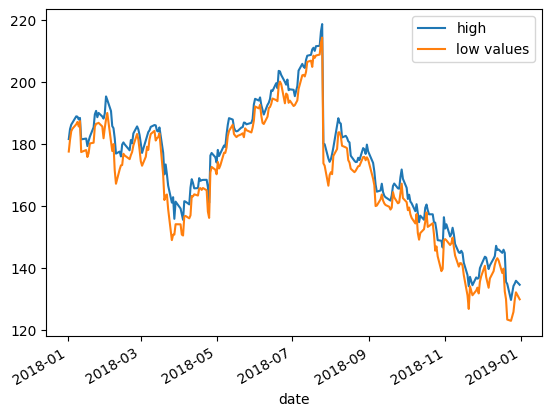

In [ ]:
df.high.plot()
df.low.plot(label='low values')
plt.legend(loc='best') #puts the ledgent in the best possible position

### Histograms

<Axes: >

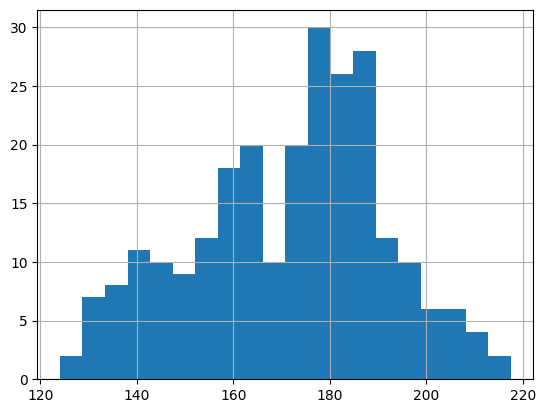

In [ ]:
#histogram for the values of a dataframe column
df.close.hist(bins=20)

<Axes: xlabel='close', ylabel='Count'>

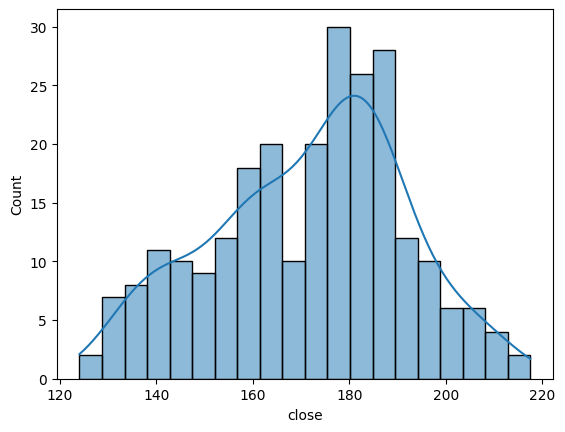

In [ ]:
#histogram with the kernel density estimation (a smoothed function over the histogram)
sns.histplot(df.close,bins=20,kde=True)

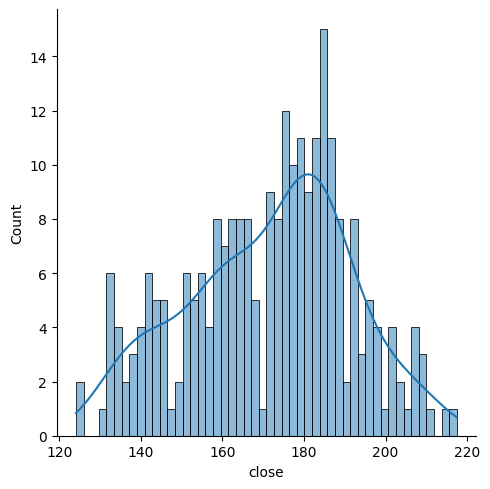

In [ ]:
sns.displot(df.close,bins=50,kde=True)

### Plotting columns against each other

In [ ]:
dff = pd.read_csv('example-functions.csv')
dfs = dff.sort_values(by='A', ascending = True) #Sorting in data frames
dfs

A         B         C         D
0    0.631930  0.727462  1.015797  0.668071
1    1.301488  0.553052  0.416444  0.841456
2    2.495414  0.293590  0.160380  0.739603
3    3.449249  0.243811  0.078789  0.554745
4    3.655596  0.258616  0.073452  0.649052
..        ...       ...       ...       ...
95  94.612046  0.010506  0.000112  0.000078
96  94.796924  0.010510  0.000111  0.000076
97  95.209703  0.010449  0.000110  0.000073
98  95.933252  0.010419  0.000109  0.000068
99  99.169216  0.010055  0.000102  0.000049

[100 rows x 4 columns]

Plot columns B,C,D against A

The plt.figure() command creates a new figure for each plot

<Axes: xlabel='A'>

<Figure size 640x480 with 0 Axes>

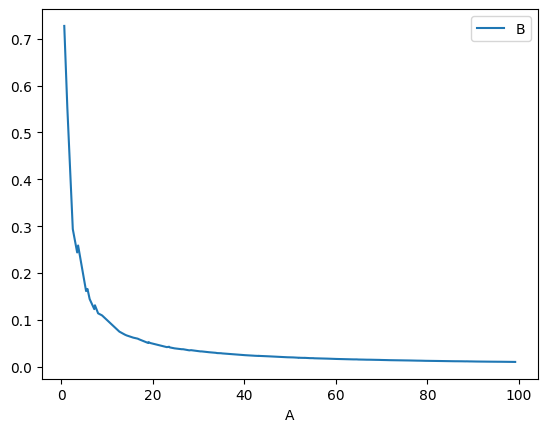

<Figure size 640x480 with 0 Axes>

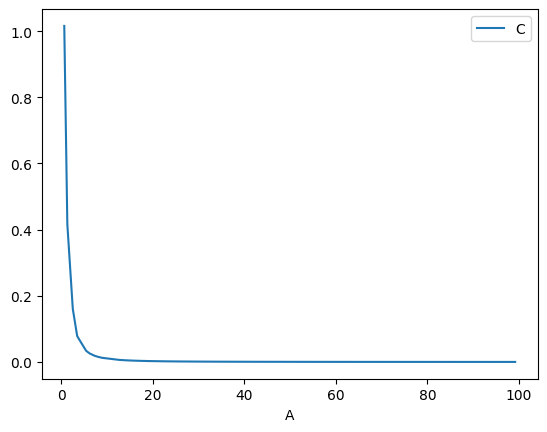

<Figure size 640x480 with 0 Axes>

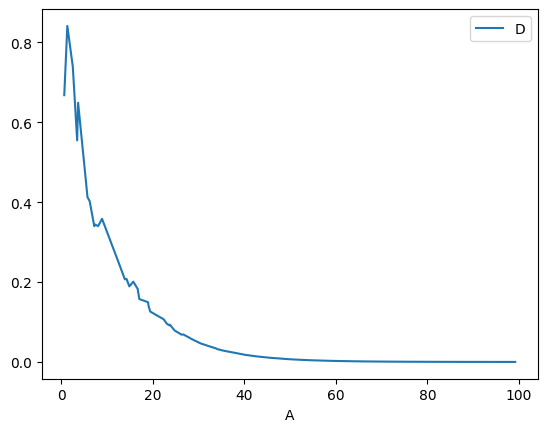

In [ ]:
plt.figure()
dfs.plot(x = 'A', y = 'B')
plt.figure()
dfs.plot(x = 'A', y = 'C')
plt.figure()
dfs.plot(x = 'A', y = 'D')

### Grid of plots

Use a grid to put all the plots together using the [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) functionality

<Axes: xlabel='A'>

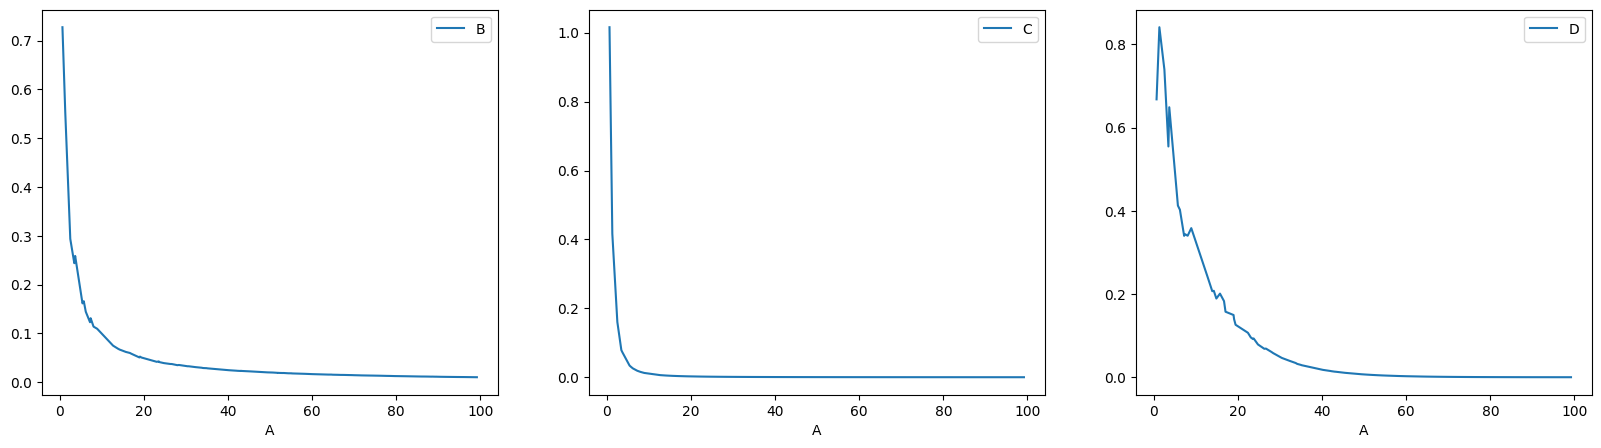

In [ ]:
#plt.figure()
fig, ax = plt.subplots(1, 3,figsize=(20,5))
dfs.plot(x = 'A', y = 'B',ax = ax[0])
dfs.plot(x = 'A', y = 'C',ax = ax[1])
dfs.plot(x = 'A', y = 'D',ax = ax[2])

Plot all colums together against A.

Clearly they are different functions

<Axes: xlabel='A'>

<Figure size 640x480 with 0 Axes>

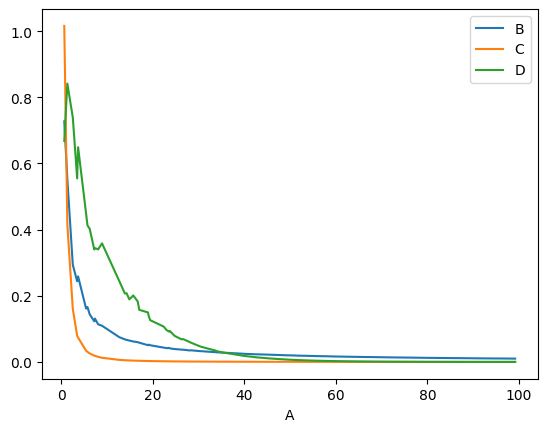

In [ ]:
plt.figure()
dfs.plot(x = 'A', y = ['B','C','D'])

Plot all columns against A in log-log scale (take the logarithm for the values in both axes)

We observe straight lines for B,C while steeper drop for D. The B and C are a polynomial function of A

<Figure size 640x480 with 0 Axes>

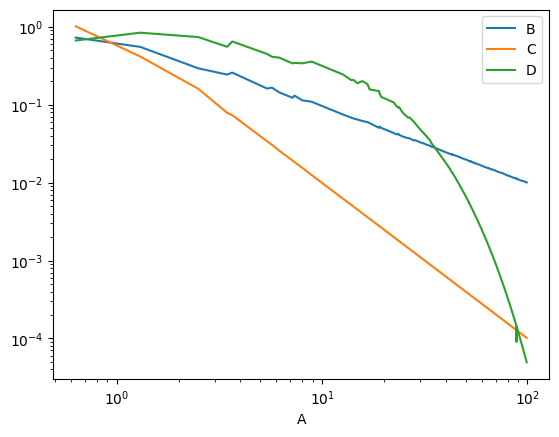

In [ ]:
plt.figure(); dfs.plot(x = 'A', y = ['B','C','D'], loglog=True);

Plot with log scale only on y-axis (log-linear plot).

The plot of D becomes a line, indicating that D is an exponential function of A

<Axes: xlabel='A'>

<Figure size 640x480 with 0 Axes>

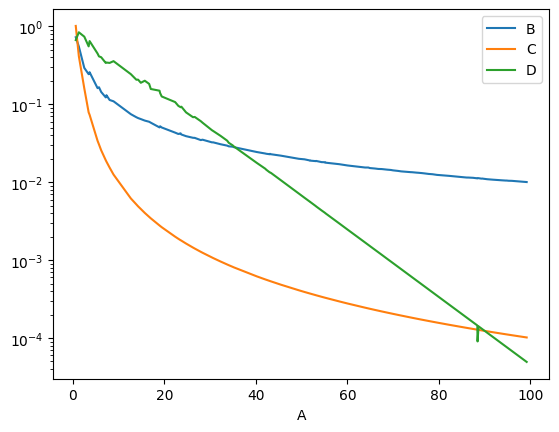

In [ ]:
plt.figure()
dfs.plot(x = 'A', y = ['B','C','D'], logy=True)

### Plotting using matplotlib

Also how to put two figures in a 1x2 grid

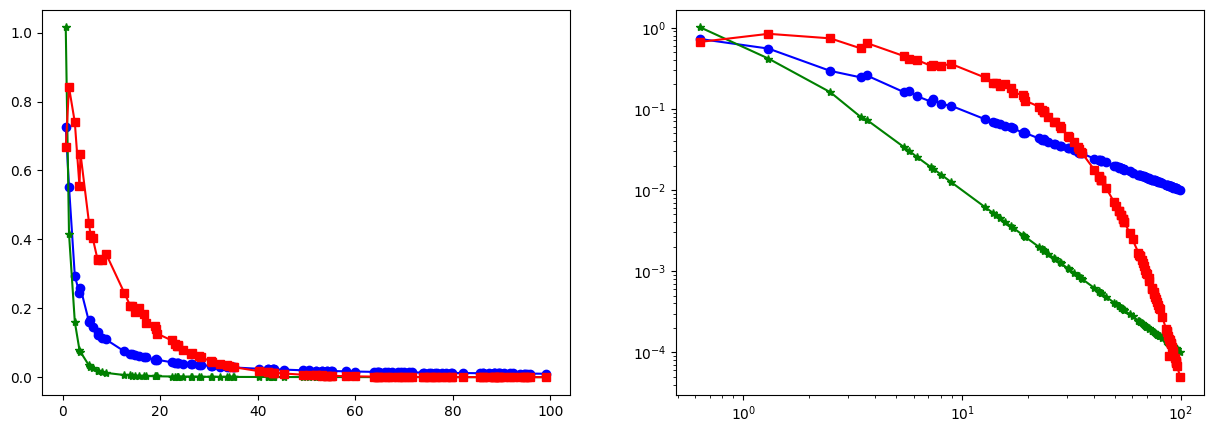

In [ ]:
plt.figure(figsize = (15,5)) #defines the size of figure
plt.subplot(121) #plot with 1 row, 2 columns, 1st plot
plt.plot(dfs['A'],dfs['B'],'bo-',dfs['A'],dfs['C'],'g*-',dfs['A'],dfs['D'],'rs-')
plt.subplot(122)  #plot with 1 row, 2 columns, 2nd plot
plt.loglog(dfs['A'],dfs['B'],'bo-',dfs['A'],dfs['C'],'g*-',dfs['A'],dfs['D'],'rs-')

Using seaborn

<Axes: xlabel='A', ylabel='B'>

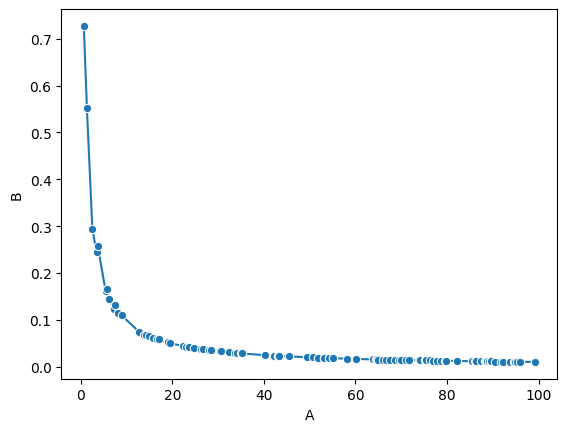

In [ ]:
sns.lineplot(x= 'A', y='B',data = dfs,marker='o')

### Scatter plots ###

Scatter plots take as imput two series X and Y and plot the points (x,y).

We will do the same plots as before as scatter plots using the dataframe functions

<Axes: xlabel='A', ylabel='B'>

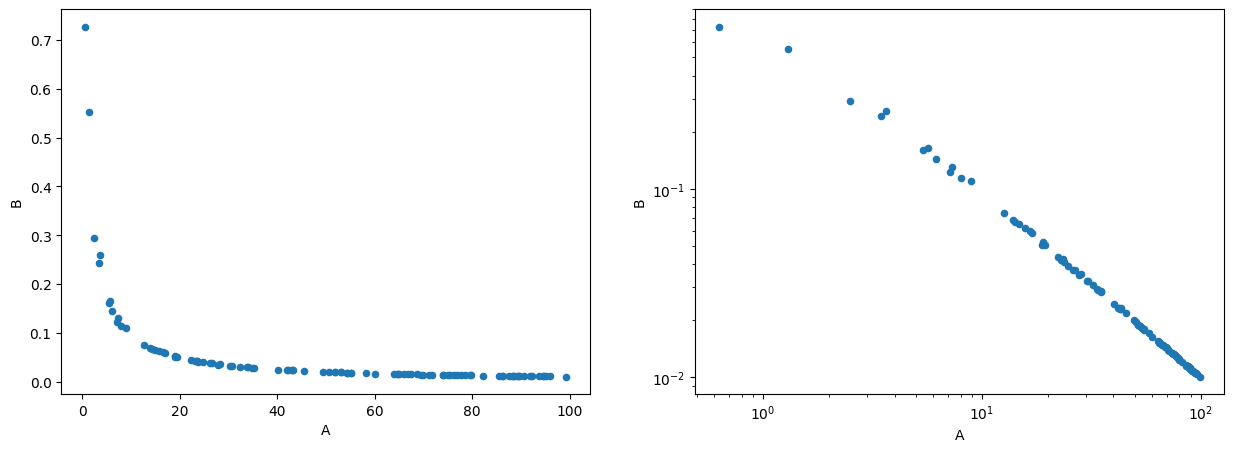

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
dff.plot(kind ='scatter', x='A', y='B', ax = ax[0])
dff.plot(kind ='scatter', x='A', y='B', loglog = True,ax = ax[1])

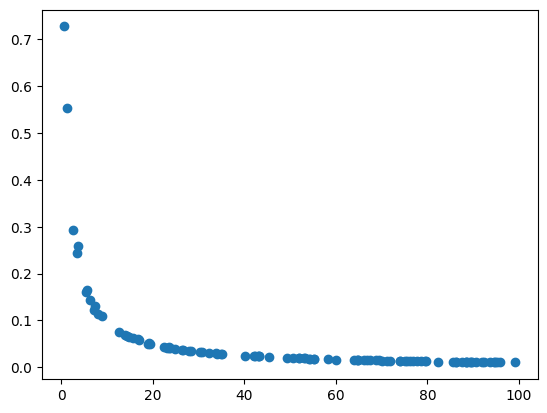

In [ ]:
plt.scatter(dff.A, dff.B)

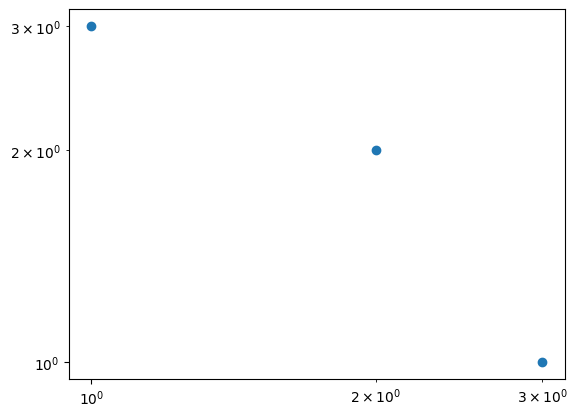

In [ ]:
fig = plt.figure()
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.scatter([1,2,3],[3,2,1])

Putting many scatter plots into the same plot

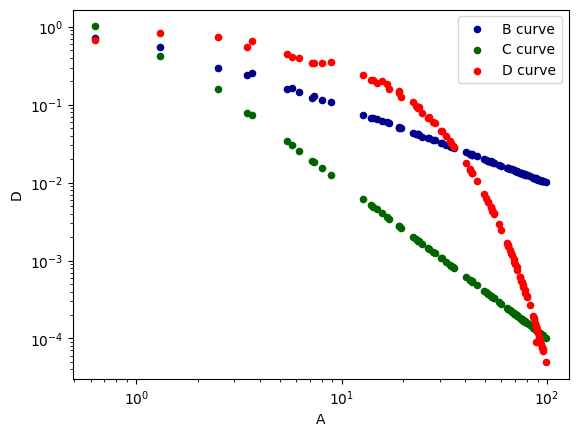

In [ ]:
t = dff.plot(kind='scatter', x='A', y='B', color='DarkBlue', label='B curve', loglog=True);
dff.plot(kind='scatter', x='A', y='C',color='DarkGreen', label='C curve', ax=t, loglog = True);
dff.plot(kind='scatter', x='A', y='D',color='Red', label='D curve', ax=t, loglog = True);

**Using seaborn**

<Axes: xlabel='A', ylabel='B'>

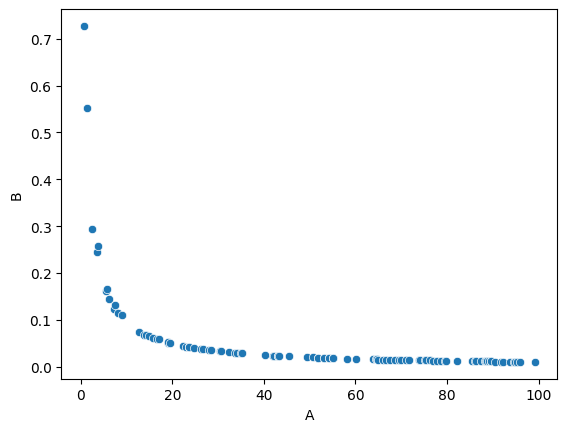

In [ ]:
sns.scatterplot(x='A',y='B', data = dff)

In log-log scale (for some reason it seems to throw away small values)

[]

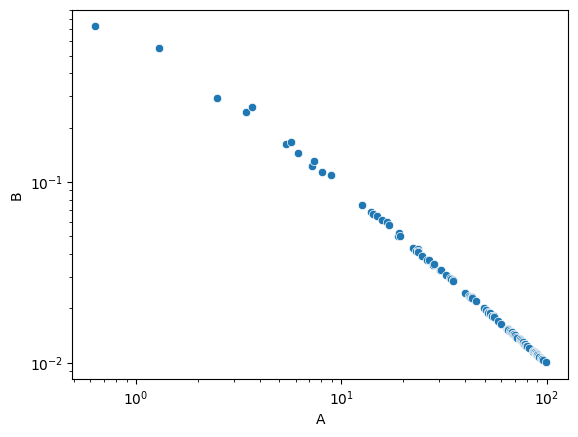

In [ ]:
splot = sns.scatterplot(x='A',y='B', data = dff)
#splot.set(xscale="log", yscale="log")
splot.loglog()

### Statistical Significance ###

Recall the dataframe we obtained when grouping by gain

In [12]:
gdf

gain        open         low        high       close           vol
0   large_gain  170.111111  169.610833  175.313056  174.653889  3.044808e+07
1  medium_gain  172.305769  171.410962  175.321346  174.185577  2.774962e+07
2     negative  171.605492  168.137747  172.566230  169.380246  2.731642e+07
3   small_gain  171.218049  169.827317  173.070488  171.699268  2.476326e+07

We see that there are differences in the volume of trading depending on the gain. But are these differences statistically significant?  We can test that using the Student t-test. The Student t-test will give us a value for the differnece between the means in units of standard error, and a p-value that says how important this difference is. Usually we require the p-value to be less than 0.05 (or 0.01 if we want to be more strict). Note that for the test we will need to use all the values in the group.

To compute the t-test we will use the **SciPy** library, a Python library for scientific computing.

### The Student t-test

In [13]:
import scipy as sp #library for scientific computations
from scipy import stats #The statistics part of the library

The t-test value is:

$$t = \frac{\bar{x}_1-\bar{x}_2}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}} $$

where $\bar x_i$ is the mean value of the $i$ dataset, $\sigma_i^2$ is the variance, and $n_i$ is the size.

In [14]:
#Test statistical significance of the difference in the mean volume numbers

sm = gain_groups.get_group('small_gain').vol
lg = gain_groups.get_group('large_gain').vol
med = gain_groups.get_group('medium_gain').vol
neg = gain_groups.get_group('negative').vol
print(stats.ttest_ind(sm,neg,equal_var = False))
print(stats.ttest_ind(sm,med, equal_var = False))
print(stats.ttest_ind(sm,lg, equal_var = False))
print(stats.ttest_ind(neg,med,equal_var = False))
print(stats.ttest_ind(neg,lg,equal_var = False))
print(stats.ttest_ind(med,lg, equal_var = False))

TtestResult(statistic=-0.7237664320493662, pvalue=0.4720843830832102, df=58.686780477477306)
TtestResult(statistic=-0.6532701783697626, pvalue=0.5152447681117652, df=90.15236633446038)
TtestResult(statistic=-1.2743420856982142, pvalue=0.20648370530531482, df=74.86473858994728)
TtestResult(statistic=-0.12034041075217132, pvalue=0.9045425277099464, df=73.34821305978315)
TtestResult(statistic=-0.9054964354181412, pvalue=0.36935442852925515, df=52.30908445486685)
TtestResult(statistic=-0.5972302166465407, pvalue=0.5519534365894707, df=84.35529071251472)


### Kolomogorov-Smirnov Test

Test if the data for small and large gain come from the same distribution.
The p-value > 0.1 inidcates that we cannot reject the null hypothesis that they do come from the same distribution.

Use scipy.stats.ks_2samp for testing two samples if they come form the same distribution.

If you want to test a single sample against a fixed distribution (e.g., normal) use the scipy.stats.kstest

In [15]:
import numpy as np
stats.ks_2samp(np.array(sm), np.array(lg), alternative='two-sided')

KstestResult(statistic=0.2703252032520325, pvalue=0.09473208642418271, statistic_location=26266081, statistic_sign=1)

In [17]:
stats.kstest(np.array(sm), 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=10464528, statistic_sign=-1)

<Axes: xlabel='vol', ylabel='Count'>

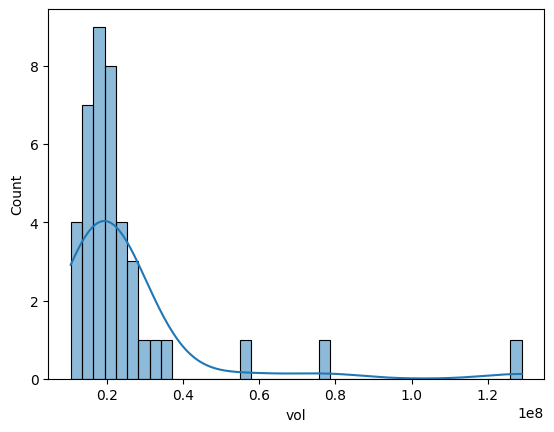

In [18]:
sns.histplot(sm,bins=40,kde=True)

### $\chi^2$-test

We use the $\chi^2$-test to test if two random variables are independent. The larger the value of the test the farther from independence. The p-value tells us whether the value is statistically significant.

In [20]:
df

open   close     low    high       vol  profit  \
date                                                                          
2018-01-02 00:00:00+00:00  177.68  181.42  177.55  181.58  17694891    3.74   
2018-01-03 00:00:00+00:00  181.88  184.67  181.33  184.78  16595495    2.79   
2018-01-04 00:00:00+00:00  184.90  184.33  184.10  186.21  13554357   -0.57   
2018-01-05 00:00:00+00:00  185.59  186.85  184.93  186.90  13042388    1.26   
2018-01-08 00:00:00+00:00  187.20  188.28  186.33  188.90  14719216    1.08   
...                           ...     ...     ...     ...       ...     ...   
2018-12-24 00:00:00+00:00  123.10  124.06  123.02  129.74  22066002    0.96   
2018-12-26 00:00:00+00:00  126.00  134.18  125.89  134.24  39723370    8.18   
2018-12-27 00:00:00+00:00  132.44  134.52  129.67  134.99  31202509    2.08   
2018-12-28 00:00:00+00:00  135.34  133.20  132.20  135.92  22627569   -2.14   
2018-12-31 00:00:00+00:00  134.45  131.09  129.95  134.64  24625308   -3.36   

                                  gain   size  
date                                           
2018-01-02 00:00:00+00:00   large_gain  small  
2018-01-03 00:00:00+00:00  medium_gain  small  
2018-01-04 00:00:00+00:00     negative  small  
2018-01-05 00:00:00+00:00  medium_gain  small  
2018-01-08 00:00:00+00:00  medium_gain  small  
...                                ...    ...  
2018-12-24 00:00:00+00:00   small_gain  small  
2018-12-26 00:00:00+00:00   large_gain  large  
2018-12-27 00:00:00+00:00  medium_gain  large  
2018-12-28 00:00:00+00:00     negative  small  
2018-12-31 00:00:00+00:00     negative  small  

[251 rows x 8 columns]

In [19]:
# The crosstab methond creates the contigency table for the two attributes.
cdf = pd.crosstab(df['gain'],df['size'])
cdf

size         large  small
gain                     
large_gain      15     21
medium_gain     12     40
negative        39     83
small_gain       6     35

We will use the [chi2_contigency function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) which compares the contigency table against the expected values as produced by the marginal distributions (see also the [chisquare function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html) which assumes uniform marginals).

The chi2_contigency returns:
<ol>
    <li> The chi2 test statistic
    <li> The p-value
    <li> The degrees of freedom
    <li> The table with the expected counts
    <\ol>

In [21]:
stats.chi2_contingency(cdf)

Chi2ContingencyResult(statistic=8.364478767414871, pvalue=0.03905004813922891, dof=3, expected_freq=array([[10.32669323, 25.67330677],
       [14.91633466, 37.08366534],
       [34.99601594, 87.00398406],
       [11.76095618, 29.23904382]]))

We got p-value = 0.03905 < 0.05. Why do I get now Correlation between trading volume and gain ? Let's make a new contingency table and see what happens:

In [22]:
new_df = df.copy()

# Calculate the quantiles for dividing the `vol` column into five categories
quantiles = new_df['vol'].quantile([0.2, 0.4, 0.6, 0.8]).values

# Define categories based on quantile ranges
for idx, row in new_df.iterrows():
    if row.vol < quantiles[0]:
        new_df.loc[idx, 'size'] = 'very small'
    elif row.vol < quantiles[1]:
        new_df.loc[idx, 'size'] = 'small'
    elif row.vol < quantiles[2]:
        new_df.loc[idx, 'size'] = 'medium'
    elif row.vol < quantiles[3]:
        new_df.loc[idx, 'size'] = 'large'
    else:
        new_df.loc[idx, 'size'] = 'very large'

new_df.head()

open   close     low    high       vol  profit  \
date                                                                          
2018-01-02 00:00:00+00:00  177.68  181.42  177.55  181.58  17694891    3.74   
2018-01-03 00:00:00+00:00  181.88  184.67  181.33  184.78  16595495    2.79   
2018-01-04 00:00:00+00:00  184.90  184.33  184.10  186.21  13554357   -0.57   
2018-01-05 00:00:00+00:00  185.59  186.85  184.93  186.90  13042388    1.26   
2018-01-08 00:00:00+00:00  187.20  188.28  186.33  188.90  14719216    1.08   

                                  gain        size  
date                                                
2018-01-02 00:00:00+00:00   large_gain       small  
2018-01-03 00:00:00+00:00  medium_gain  very small  
2018-01-04 00:00:00+00:00     negative  very small  
2018-01-05 00:00:00+00:00  medium_gain  very small  
2018-01-08 00:00:00+00:00  medium_gain  very small

In [23]:
cdf = pd.crosstab(new_df['gain'],new_df['size'])
cdf

size         large  medium  small  very large  very small
gain                                                     
large_gain       5       3     11          12           5
medium_gain     13      13      9           7          10
negative        27      23     21          27          24
small_gain       5      11      9           5          11

In [24]:
stats.chi2_contingency(cdf)

Chi2ContingencyResult(statistic=17.156150315137896, pvalue=0.14381727155690543, dof=12, expected_freq=array([[ 7.17131474,  7.17131474,  7.17131474,  7.31474104,  7.17131474],
       [10.35856574, 10.35856574, 10.35856574, 10.56573705, 10.35856574],
       [24.30278884, 24.30278884, 24.30278884, 24.78884462, 24.30278884],
       [ 8.16733068,  8.16733068,  8.16733068,  8.33067729,  8.16733068]]))

The p-value now increased!

### Exact fisher test

Another statistical test used to determine if there is a significant association between two categorical variables. Unlike the chi-square test, which approximates the association using large-sample assumptions, Fisher’s Exact Test calculates the exact probability, making it particularly suitable for small sample sizes or when one or more categories have low counts. Fisher’s test is typically used for 2x2 contigency tables (two categories in each variable)

In [25]:
df_fisher = df.copy()
df_fisher['gain'] = df['gain'].apply(lambda x: 'positive_gain' if x in ['small_gain', 'medium_gain', 'large_gain'] else 'negative')


In [26]:
df_fisher

open   close     low    high       vol  profit  \
date                                                                          
2018-01-02 00:00:00+00:00  177.68  181.42  177.55  181.58  17694891    3.74   
2018-01-03 00:00:00+00:00  181.88  184.67  181.33  184.78  16595495    2.79   
2018-01-04 00:00:00+00:00  184.90  184.33  184.10  186.21  13554357   -0.57   
2018-01-05 00:00:00+00:00  185.59  186.85  184.93  186.90  13042388    1.26   
2018-01-08 00:00:00+00:00  187.20  188.28  186.33  188.90  14719216    1.08   
...                           ...     ...     ...     ...       ...     ...   
2018-12-24 00:00:00+00:00  123.10  124.06  123.02  129.74  22066002    0.96   
2018-12-26 00:00:00+00:00  126.00  134.18  125.89  134.24  39723370    8.18   
2018-12-27 00:00:00+00:00  132.44  134.52  129.67  134.99  31202509    2.08   
2018-12-28 00:00:00+00:00  135.34  133.20  132.20  135.92  22627569   -2.14   
2018-12-31 00:00:00+00:00  134.45  131.09  129.95  134.64  24625308   -3.36   

                                    gain   size  
date                                             
2018-01-02 00:00:00+00:00  positive_gain  small  
2018-01-03 00:00:00+00:00  positive_gain  small  
2018-01-04 00:00:00+00:00       negative  small  
2018-01-05 00:00:00+00:00  positive_gain  small  
2018-01-08 00:00:00+00:00  positive_gain  small  
...                                  ...    ...  
2018-12-24 00:00:00+00:00  positive_gain  small  
2018-12-26 00:00:00+00:00  positive_gain  large  
2018-12-27 00:00:00+00:00  positive_gain  large  
2018-12-28 00:00:00+00:00       negative  small  
2018-12-31 00:00:00+00:00       negative  small  

[251 rows x 8 columns]

In [27]:
# Create a 2x2 contingency table
contingency_table_fisher = pd.crosstab(df_fisher['gain'], df['size'])
print("Contingency Table:")
print(contingency_table_fisher)

Contingency Table:
size           large  small
gain                       
negative          39     83
positive_gain     33     96


In [28]:
from scipy.stats import fisher_exact

oddsratio, p_value = fisher_exact(contingency_table_fisher)
print("\nFisher's Exact Test Results:")
print(f"Odds Ratio: {oddsratio}")
print(f"P-Value: {p_value}")


Fisher's Exact Test Results:
Odds Ratio: 1.366922234392114
P-Value: 0.26848533307073885


Now p-value is greater than 0.05 and so there is no statistically significant association between gain and size. This reinforces previous findings from the Student’s t-test and Kolmogorov-Smirnov test, which also suggested that trading volume does not correlate strongly with daily gain outcomes.

### Error bars

We can compute the standard error of the mean using the <tt>stats.sem </tt> method of scipy, which can also be called from the data frame

In [29]:
print(sm.sem())
print(neg.sem())
print(stats.sem(med))
print(stats.sem(lg))

3192415.794566366
1500801.0916460739
3272021.3263068898
3115899.1280031265


Computing confidence intervals

In [30]:
#confidence interval
conf = 0.95
t = stats.t.ppf((1+conf)/2.0, len(df)-1)
low = sm.mean()-sm.sem()*t
high = sm.mean()+sm.sem()*t
print(low,  ",", high)

18475802.95317895 , 31050718.510235682


We can also visualize the mean and the standard error in a bar-plot, using the barplot function of seaborn. Note that we need to apply this to the original data. The averaging is done automatically.

<Axes: xlabel='gain', ylabel='vol'>

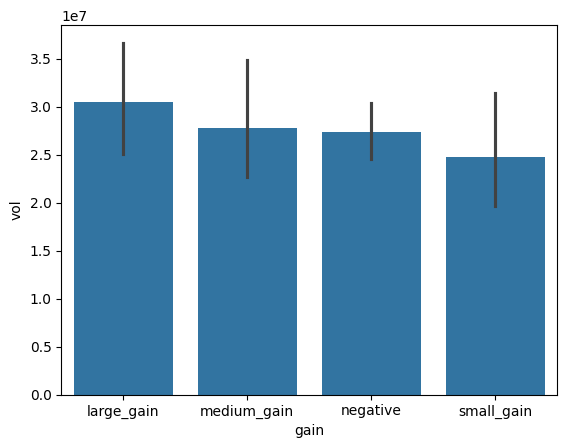

In [31]:
#sns.barplot(x='gain',y='vol', data = df, ci=95) #for older seaborn versions
sns.barplot(x='gain',y='vol', data = df, errorbar=('ci', 95))

<ipython-input-32-9cf449b89e92>:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='gain',y='vol', data = df,join = False, errorbar=('ci', 95), capsize = 0.1)


<Axes: xlabel='gain', ylabel='vol'>

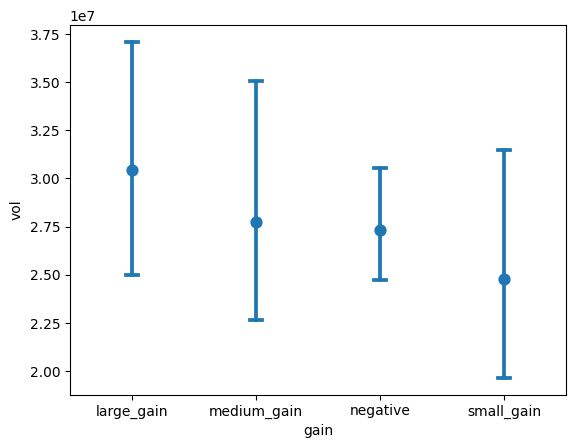

In [32]:
sns.pointplot(x='gain',y='vol', data = df,join = False, errorbar=('ci', 95), capsize = 0.1)

### Visualizing distributions

We can also visualize the distribution using a **box-plot**. In the box plot, the box shows the quartiles of the dataset (the part between the higher 25% and lower 25%), while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers”. The line shows the median.

<Axes: xlabel='gain', ylabel='vol'>

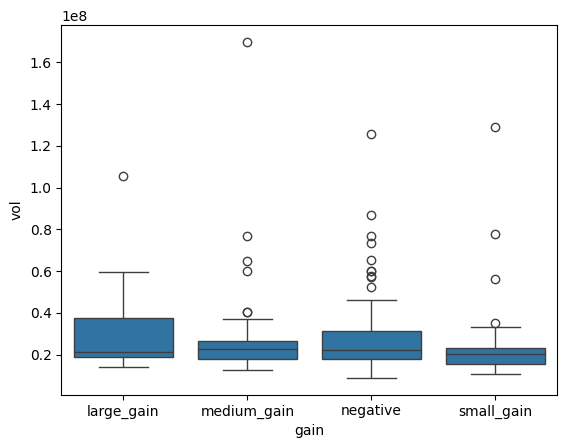

In [33]:
sns.boxplot(x='gain',y='vol', data = df)

<Axes: xlabel='gain', ylabel='vol'>

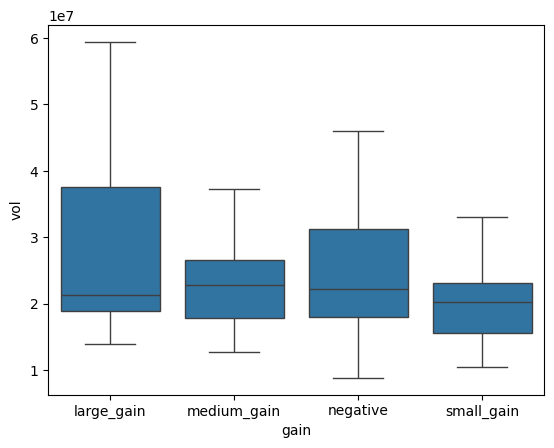

In [34]:
#Removing outliers
sns.boxplot(x='gain',y='vol', data = df, showfliers = False)

We can also use a [**violin plot**](https://seaborn.pydata.org/generated/seaborn.violinplot.html) to visualize the distributions

<Axes: xlabel='gain', ylabel='vol'>

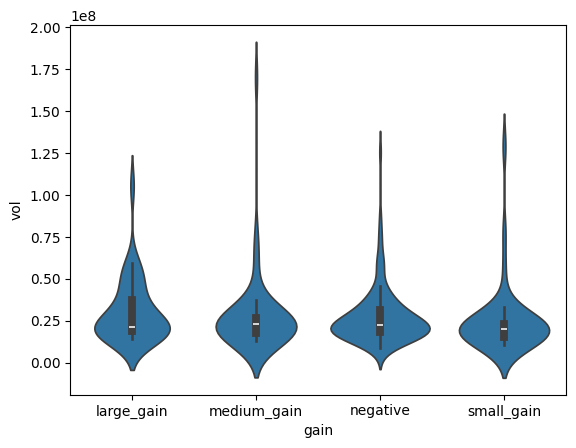

In [35]:
sns.violinplot(x='gain',y='vol', data = df)

<Axes: xlabel='all', ylabel='profit'>

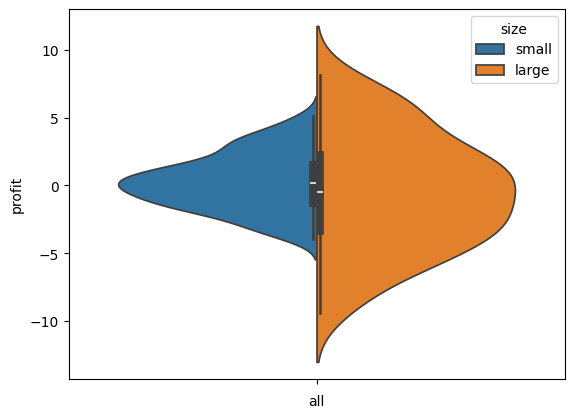

In [36]:
df['all'] = ''
sns.violinplot(x = 'all', y='profit',hue='size', split=True, data = df)

<Axes: xlabel='gain', ylabel='profit'>

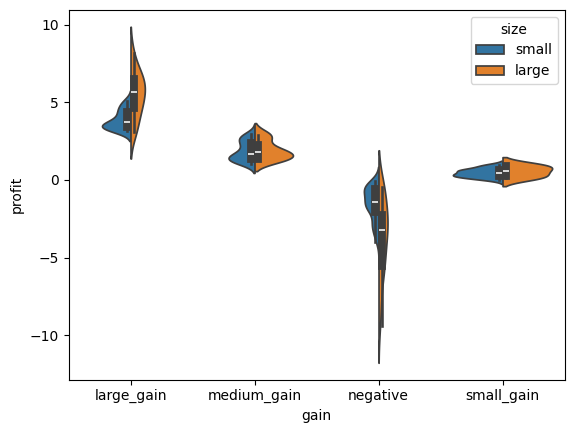

In [37]:
sns.violinplot(x='gain',y='profit', hue='size', data = df, split=True)

### Seaborn lineplot

Plot the average volume over the different months

In [40]:
df

date    open   close     low    high       vol  \
0   2018-01-02 00:00:00+00:00  177.68  181.42  177.55  181.58  17694891   
1   2018-01-03 00:00:00+00:00  181.88  184.67  181.33  184.78  16595495   
2   2018-01-04 00:00:00+00:00  184.90  184.33  184.10  186.21  13554357   
3   2018-01-05 00:00:00+00:00  185.59  186.85  184.93  186.90  13042388   
4   2018-01-08 00:00:00+00:00  187.20  188.28  186.33  188.90  14719216   
..                        ...     ...     ...     ...     ...       ...   
246 2018-12-24 00:00:00+00:00  123.10  124.06  123.02  129.74  22066002   
247 2018-12-26 00:00:00+00:00  126.00  134.18  125.89  134.24  39723370   
248 2018-12-27 00:00:00+00:00  132.44  134.52  129.67  134.99  31202509   
249 2018-12-28 00:00:00+00:00  135.34  133.20  132.20  135.92  22627569   
250 2018-12-31 00:00:00+00:00  134.45  131.09  129.95  134.64  24625308   

     profit         gain   size all  
0      3.74   large_gain  small      
1      2.79  medium_gain  small      
2     -0.57     negative  small      
3      1.26  medium_gain  small      
4      1.08  medium_gain  small      
..      ...          ...    ...  ..  
246    0.96   small_gain  small      
247    8.18   large_gain  large      
248    2.08  medium_gain  large      
249   -2.14     negative  small      
250   -3.36     negative  small      

[251 rows x 10 columns]

In [39]:
df = df.reset_index()
#df.date = df.date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))
#df.date = df.date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d %H:%M:%S%z").strftime("%Y-%m-%d"))


In [41]:
def get_month(row):
    return row.date.month

df['month'] = df.apply(get_month,axis = 1)

In [42]:
df

date    open   close     low    high       vol  \
0   2018-01-02 00:00:00+00:00  177.68  181.42  177.55  181.58  17694891   
1   2018-01-03 00:00:00+00:00  181.88  184.67  181.33  184.78  16595495   
2   2018-01-04 00:00:00+00:00  184.90  184.33  184.10  186.21  13554357   
3   2018-01-05 00:00:00+00:00  185.59  186.85  184.93  186.90  13042388   
4   2018-01-08 00:00:00+00:00  187.20  188.28  186.33  188.90  14719216   
..                        ...     ...     ...     ...     ...       ...   
246 2018-12-24 00:00:00+00:00  123.10  124.06  123.02  129.74  22066002   
247 2018-12-26 00:00:00+00:00  126.00  134.18  125.89  134.24  39723370   
248 2018-12-27 00:00:00+00:00  132.44  134.52  129.67  134.99  31202509   
249 2018-12-28 00:00:00+00:00  135.34  133.20  132.20  135.92  22627569   
250 2018-12-31 00:00:00+00:00  134.45  131.09  129.95  134.64  24625308   

     profit         gain   size all  month  
0      3.74   large_gain  small          1  
1      2.79  medium_gain  small          1  
2     -0.57     negative  small          1  
3      1.26  medium_gain  small          1  
4      1.08  medium_gain  small          1  
..      ...          ...    ...  ..    ...  
246    0.96   small_gain  small         12  
247    8.18   large_gain  large         12  
248    2.08  medium_gain  large         12  
249   -2.14     negative  small         12  
250   -3.36     negative  small         12  

[251 rows x 11 columns]

<Axes: xlabel='month', ylabel='vol'>

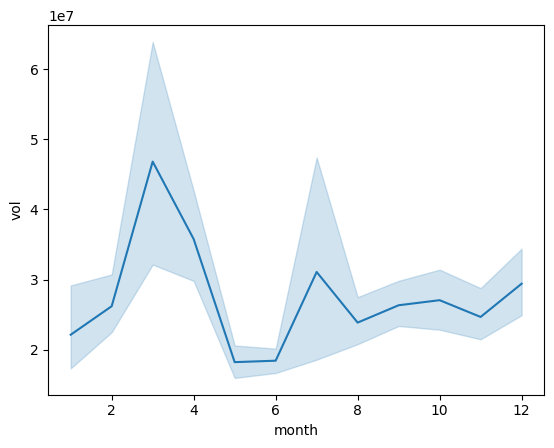

In [43]:
#sns.lineplot(x='month', y = 'vol', data = df, ci=95)
sns.lineplot(x='month', y = 'vol', data = df, errorbar=('ci', 95))

<Axes: xlabel='month', ylabel='vol'>

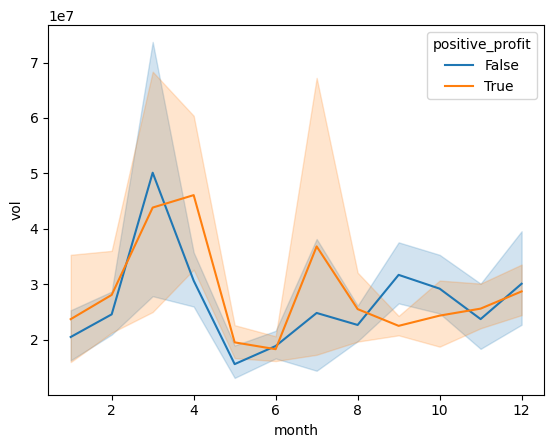

In [44]:
df['positive_profit'] = (df.profit>0)
sns.lineplot(x='month', y = 'vol', hue='positive_profit', data = df)

In [45]:
df.drop('date',axis=1)

open   close     low    high       vol  profit         gain   size all  \
0    177.68  181.42  177.55  181.58  17694891    3.74   large_gain  small       
1    181.88  184.67  181.33  184.78  16595495    2.79  medium_gain  small       
2    184.90  184.33  184.10  186.21  13554357   -0.57     negative  small       
3    185.59  186.85  184.93  186.90  13042388    1.26  medium_gain  small       
4    187.20  188.28  186.33  188.90  14719216    1.08  medium_gain  small       
..      ...     ...     ...     ...       ...     ...          ...    ...  ..   
246  123.10  124.06  123.02  129.74  22066002    0.96   small_gain  small       
247  126.00  134.18  125.89  134.24  39723370    8.18   large_gain  large       
248  132.44  134.52  129.67  134.99  31202509    2.08  medium_gain  large       
249  135.34  133.20  132.20  135.92  22627569   -2.14     negative  small       
250  134.45  131.09  129.95  134.64  24625308   -3.36     negative  small       

     month  positive_profit  
0        1             True  
1        1             True  
2        1            False  
3        1             True  
4        1             True  
..     ...              ...  
246     12             True  
247     12             True  
248     12             True  
249     12            False  
250     12            False  

[251 rows x 11 columns]

## Comparing multiple stocks

As a last task, we will use the experience we obtained so far -- and learn some new things -- in order to compare the performance of different stocks we obtained from Yahoo finance.

In [46]:
from tiingo import TiingoClient
client = TiingoClient({'api_key':'614c1590a592cc6696f6082f83b2666cd83882ef'})
ticker_history = client.get_dataframe(['GOOGL', 'AAPL'],
                                      frequency='daily',
                                      metric_name='close',
                                      startDate='2017-01-01',
                                      endDate='2018-05-31')

In [47]:
ticker_history.head()

GOOGL    AAPL
2017-01-03 00:00:00+00:00  808.01  116.15
2017-01-04 00:00:00+00:00  807.77  116.02
2017-01-05 00:00:00+00:00  813.02  116.61
2017-01-06 00:00:00+00:00  825.21  117.91
2017-01-09 00:00:00+00:00  827.18  118.99

In [48]:
stocks = ['META','GOOG','TSLA', 'MSFT','NFLX']
from tiingo import TiingoClient
client = TiingoClient({'api_key':'614c1590a592cc6696f6082f83b2666cd83882ef'})
dfmany = client.get_dataframe(stocks,
                                      frequency='daily',
                                      metric_name='close',
                                      startDate=start,
                                      endDate=end)
dfmany.head()

META     GOOG    TSLA   MSFT    NFLX
2018-01-02 00:00:00+00:00  181.42  1065.00  320.53  85.95  201.07
2018-01-03 00:00:00+00:00  184.67  1082.48  317.25  86.35  205.05
2018-01-04 00:00:00+00:00  184.33  1086.40  314.62  87.11  205.63
2018-01-05 00:00:00+00:00  186.85  1102.23  316.58  88.19  209.99
2018-01-08 00:00:00+00:00  188.28  1106.94  336.41  88.28  212.05

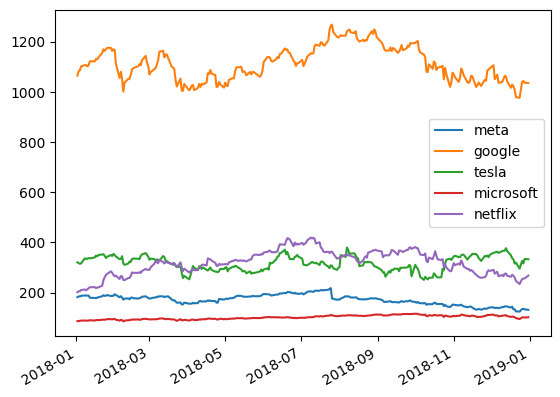

In [49]:
dfmany.META.plot(label = 'meta')
dfmany.GOOG.plot(label = 'google')
dfmany.TSLA.plot(label = 'tesla')
dfmany.MSFT.plot(label = 'microsoft')
dfmany.NFLX.plot(label = 'netflix')
_ = plt.legend(loc='best')

Next, we will calculate returns over a period of length $T$, defined as:

$$r(t) = \frac{f(t)-f(t-T)}{f(t)} $$

The returns can be computed with a simple DataFrame method **`pct_change()`**.  Note that for the first $T$ timesteps, this value is not defined (of course): Here we calculate for $T$ = 30

In [50]:
rets = dfmany.pct_change(30)
rets.iloc[25:35]

META      GOOG      TSLA      MSFT      NFLX
2018-02-07 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN
2018-02-08 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN
2018-02-09 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN
2018-02-12 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN
2018-02-13 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN
2018-02-14 00:00:00+00:00 -0.010473  0.004413  0.005553  0.056545  0.322922
2018-02-15 00:00:00+00:00 -0.025505  0.006504  0.053018  0.073075  0.366837
2018-02-16 00:00:00+00:00 -0.037813  0.007732  0.066334  0.056136  0.354472
2018-02-20 00:00:00+00:00 -0.058014  0.000209  0.057458  0.051366  0.326492
2018-02-21 00:00:00+00:00 -0.055078  0.003975 -0.009245  0.036362  0.325348

Now we'll plot the timeseries of the returns of the different stocks.

Notice that the `NaN` values are gracefully dropped by the plotting function.

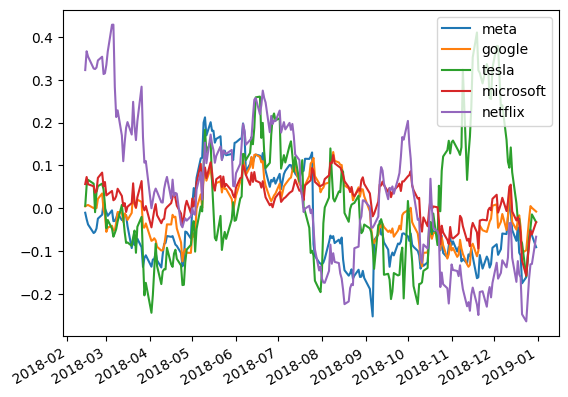

In [51]:
rets.META.plot(label = 'meta')
rets.GOOG.plot(label = 'google')
rets.TSLA.plot(label = 'tesla')
rets.MSFT.plot(label = 'microsoft')
rets.NFLX.plot(label = 'netflix')
_ = plt.legend(loc='best')

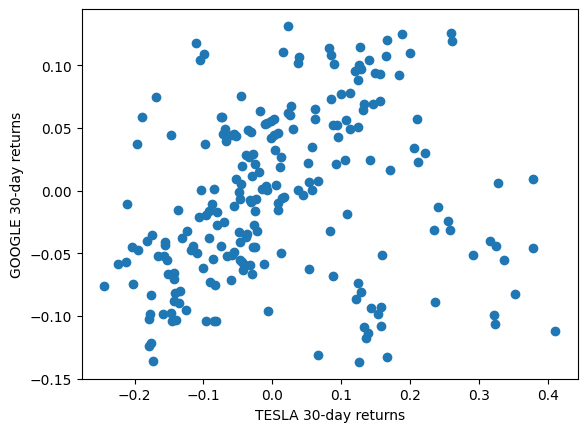

In [52]:
plt.scatter(rets.TSLA, rets.GOOG)
plt.xlabel('TESLA 30-day returns')
_ = plt.ylabel('GOOGLE 30-day returns')

We can also use the seaborn library for doing the scatterplot. Note that this method returns an object which we can use to set different parameters of the plot. In the example below we use it to set the x and y labels of the plot. Read online for more options.

In [53]:
dfb = client.get_dataframe('META',frequency='daily', startDate=start, endDate=end)[['open','high','low','close','volume']]
dgoog = client.get_dataframe('GOOG',frequency='daily', startDate=start, endDate=end)[['open','high','low','close','volume']]

In [54]:
start = datetime(2018,1,1)
end = datetime(2018,12,31)

dfb = client.get_dataframe('META',frequency='daily',startDate=start,endDate=end)
dfb = dfb[['open','close','low','high','volume']]

dgoog = client.get_dataframe('GOOG',frequency='daily',startDate=start,endDate=end)
dgoog = dgoog[['open','close','low','high','volume']]


print(dfb.head())
print(dgoog.head())

                             open   close     low    high    volume
date                                                               
2018-01-02 00:00:00+00:00  177.68  181.42  177.55  181.58  17694891
2018-01-03 00:00:00+00:00  181.88  184.67  181.33  184.78  16595495
2018-01-04 00:00:00+00:00  184.90  184.33  184.10  186.21  13554357
2018-01-05 00:00:00+00:00  185.59  186.85  184.93  186.90  13042388
2018-01-08 00:00:00+00:00  187.20  188.28  186.33  188.90  14719216
                              open    close       low     high   volume
date                                                                   
2018-01-02 00:00:00+00:00  1048.34  1065.00  1045.230  1066.94  1223114
2018-01-03 00:00:00+00:00  1064.31  1082.48  1063.210  1086.29  1416093
2018-01-04 00:00:00+00:00  1088.00  1086.40  1084.002  1093.57   990510
2018-01-05 00:00:00+00:00  1094.00  1102.23  1092.000  1104.25  1210974
2018-01-08 00:00:00+00:00  1102.23  1106.94  1101.620  1111.27  1003098


In [55]:
def gainrow(row):
    if row.close < row.open:
        return 'negative'
    elif (row.close - row.open) < 1:
        return 'small_gain'
    elif (row.close - row.open) < 3:
        return 'medium_gain'
    else:
        return 'large_gain'

dfb['gain'] = dfb.apply(gainrow, axis = 1)
dgoog['gain'] = dgoog.apply(gainrow, axis = 1)
dfb['profit'] = dfb.close-dfb.open
dgoog['profit'] = dgoog.close-dgoog.open

Text(0, 0.5, 'GOOG profit')

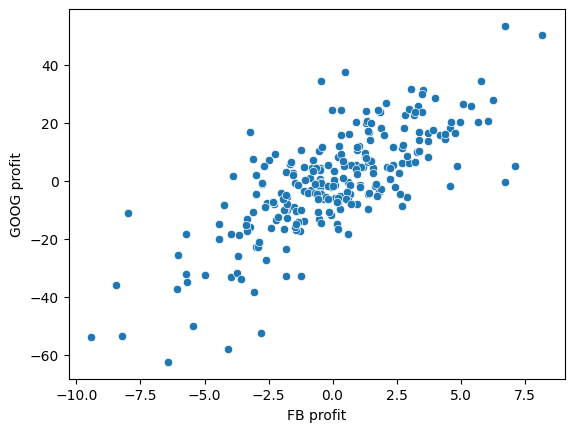

In [56]:
#Also using seaborn
fig = sns.scatterplot(x = dfb.profit, y = dgoog.profit)
fig.set_xlabel('FB profit')
fig.set_ylabel('GOOG profit')

Get all pairwise correlations in a single plot

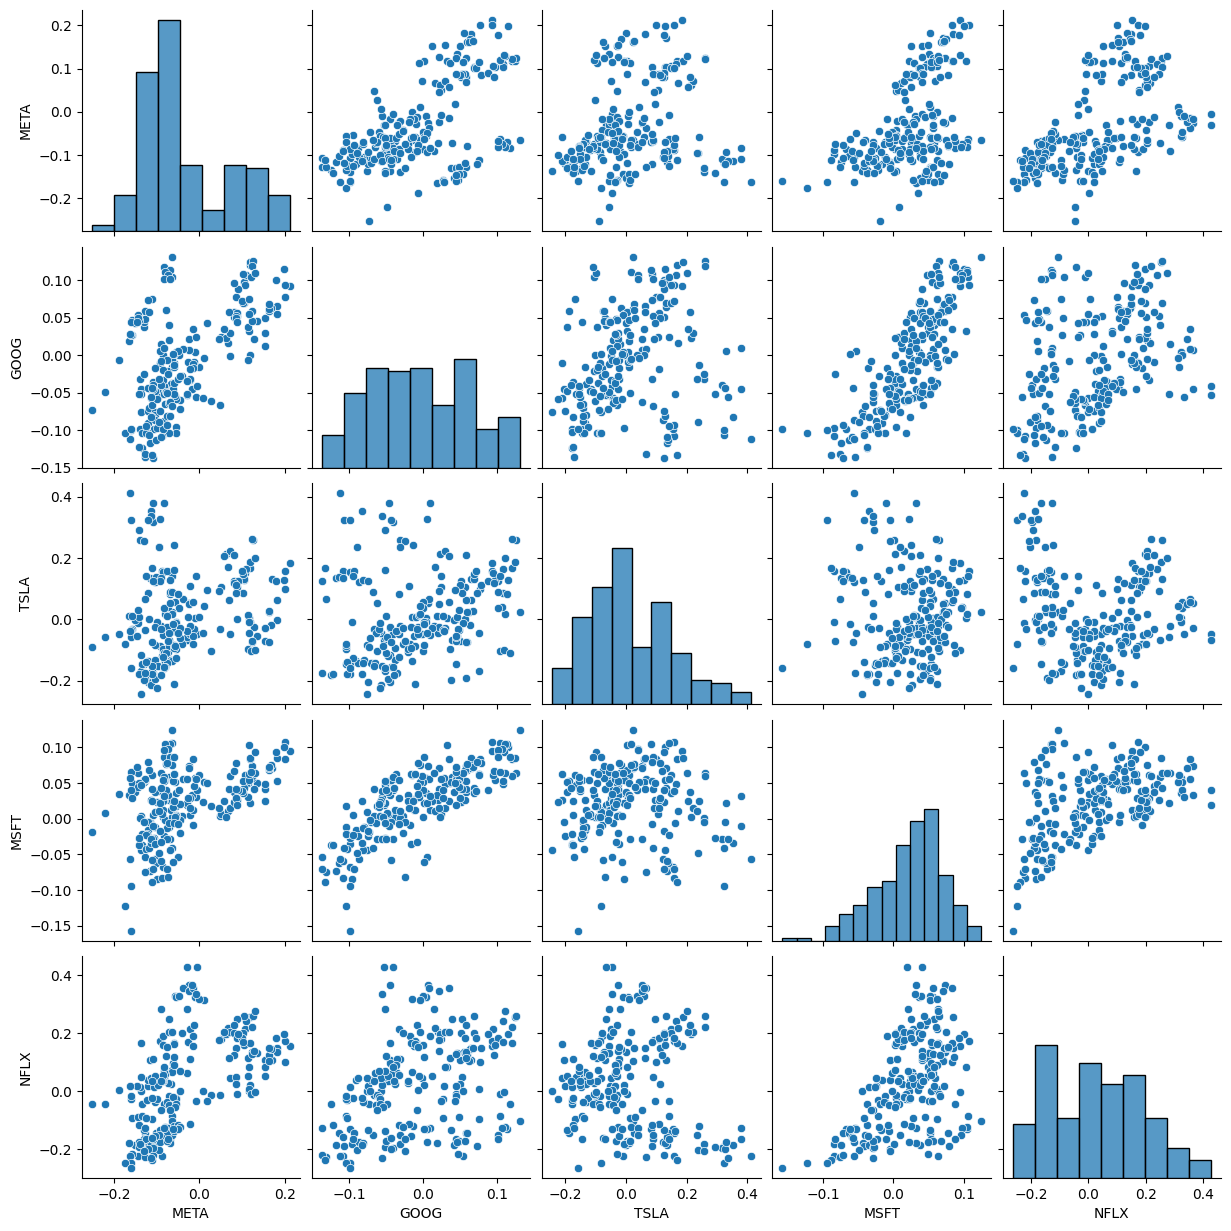

In [57]:
sns.pairplot(rets.iloc[30:])

There appears to be some (fairly strong) correlation between the movement of Google and Microsoft stocks. Let's measure this.

### Correlation Coefficients

The correlation coefficient between variables $X$ and $Y$ is defined as follows:

$$\text{Corr}(X,Y) = \frac{E\left[(X-\mu_X)(Y-\mu_Y)\right]}{\sigma_X\sigma_Y}$$

Pandas provides a DataFrame method to compute the correlation coefficient of all pairs of columns: **`corr()`**.

In [58]:
rets.corr()

META      GOOG      TSLA      MSFT      NFLX
META  1.000000  0.598776  0.226680  0.470696  0.546996
GOOG  0.598776  1.000000  0.210441  0.790085  0.348008
TSLA  0.226680  0.210441  1.000000 -0.041910 -0.120763
MSFT  0.470696  0.790085 -0.041910  1.000000  0.489569
NFLX  0.546996  0.348008 -0.120763  0.489569  1.000000

In [59]:
rets.corr(method='spearman')

META      GOOG      TSLA      MSFT      NFLX
META  1.000000  0.540949  0.271608  0.457852  0.641344
GOOG  0.540949  1.000000  0.288135  0.803731  0.382466
TSLA  0.271608  0.288135  1.000000  0.042190 -0.065939
MSFT  0.457852  0.803731  0.042190  1.000000  0.456912
NFLX  0.641344  0.382466 -0.065939  0.456912  1.000000

It takes a bit of time to examine that table and draw conclusions.  

To speed that process up it helps to visualize the table using a heatmap.

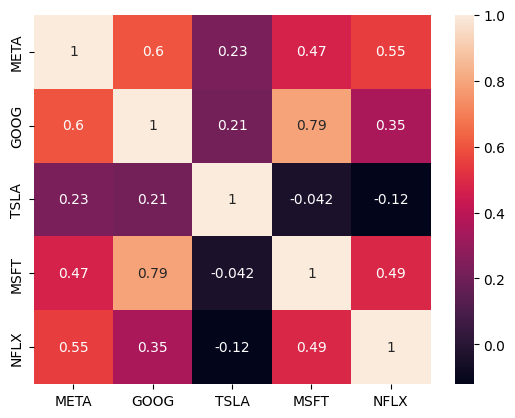

In [60]:
_ = sns.heatmap(rets.corr(), annot=True)

### Computing p-values

Use the scipy.stats library to obtain the p-values for the pearson and spearman rank correlations

In [61]:
print(stats.pearsonr(rets.iloc[30:].NFLX, rets.iloc[30:].TSLA))
print(stats.spearmanr(rets.iloc[30:].NFLX, rets.iloc[30:].TSLA))
print(stats.pearsonr(rets.iloc[30:].GOOG, rets.iloc[30:].META))
print(stats.spearmanr(rets.iloc[30:].GOOG, rets.iloc[30:].META))

PearsonRResult(statistic=-0.120762891951422, pvalue=0.07318882534649845)
SignificanceResult(statistic=-0.065938830644713, pvalue=0.32918605296193537)
PearsonRResult(statistic=0.5987760976044885, pvalue=6.856639483413373e-23)
SignificanceResult(statistic=0.5409485585956174, pvalue=3.3888933351952313e-18)


In [62]:
print(stats.pearsonr(dfb.profit, dgoog.profit))
print(stats.spearmanr(dfb.profit, dgoog.profit))

PearsonRResult(statistic=0.7546239297103, pvalue=1.817184238439732e-47)
SignificanceResult(statistic=0.724266383357056, pvalue=4.366810528478797e-42)


### Matplotlib

Finally, it is important to know that the plotting performed by Pandas is just a layer on top of `matplotlib` (i.e., the `plt` package).  

So Panda's plots can (and should) be replaced or improved by using additional functions from `matplotlib`.

For example, suppose we want to know both the returns as well as the standard deviation of the returns of a stock (i.e., its risk).  

Here is visualization of the result of such an analysis, and we construct the plot using only functions from `matplotlib`.

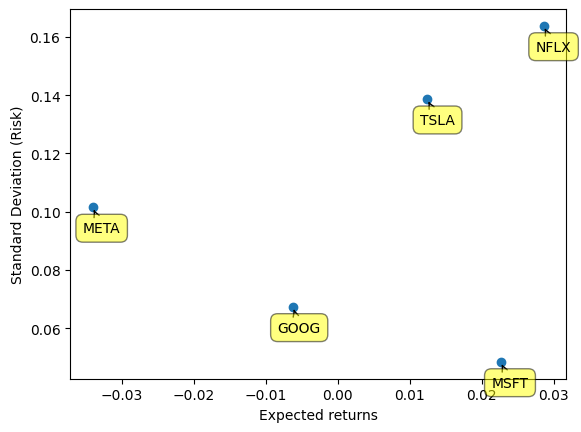

In [63]:
_ = plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard Deviation (Risk)')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

To understand what these functions are doing, (especially the `annotate` function), you will need to consult the online documentation for matplotlib.  Just use Google to find it.